In [67]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [68]:
Nt=2000
Nl=50
L=10. # Lado del cubo
tmin=0
tmax=0.5
xmin=-L/2
xmax=L/2
ymin=-L/2
ymax=L/2
dt=(tmax-tmin)/Nt
dx=(xmax-xmin)/Nl
dy=(ymax-ymin)/Nl
v=425. # m/s
r=v*dt/dx
print "r=",r

r= 0.53125


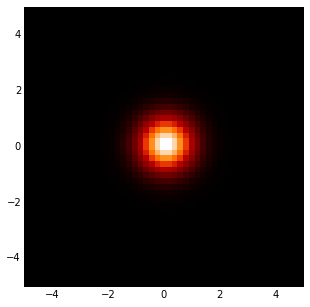

In [69]:
xcoords=np.linspace(xmin,xmax,Nl)
ycoords=np.linspace(ymin,ymax,Nl)
xmesh,ymesh=np.meshgrid(xcoords,ycoords)
tcoords=np.linspace(tmin,tmax,Nt)
#res= 1./np.sqrt(2*np.pi)*np.exp(-np.linspace(xmin,xmax,N)**2/2 - np.linspace(ymin,ymax,N)**2/2)
drum=np.zeros((Nt,Nl,Nl))
drum[0]=np.exp(-xmesh**2 - ymesh**2)
drum[1]=drum[0]+r**2/2.*(np.roll(drum[0],1,axis=0)+np.roll(drum[0],-1,axis=0)+np.roll(drum[0],1,axis=1)+np.roll(drum[0],-1,axis=1)-4*drum[0])
plt.figure(figsize=(5,5))
#plt.imshow(res,cmap='gist_heat')
plt.pcolormesh(xmesh,ymesh,drum[0],cmap='gist_heat')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

In [70]:
#creo los lados tapas=lado1,  centro lados2, otro lados3
lado1= np.zeros((Nt,Nl,Nl))
lado2= drum
lado3= np.zeros((Nt,Nl,Nl))

In [75]:
#actualizar 2:
def acta(i):
    #primera columna vecino izq
    aizq=np.zeros((Nt,Nl,3))
    for j in range(Nl):
        aizq[i,j,0]=lado3[i,0,j]
        aizq[i,j,2]=lado2[i,1,j]
    for j in range(Nl):
        paizq=aizq[i-1]
        ppaizq=aizq[i-2]
        aizq[i,j,1]=2*(1.-2.*r**2)*paizq-ppaizq+r**2*(np.roll(aizq,1,axis=0)+np.roll(aizq,-1,axis=0))
    print aizq

In [76]:
acta(3)

ValueError: setting an array element with a sequence.

In [49]:
for i in range(2,Nt):    
    plado1=lado1[i-1]
    pplado1=lado1[i-2]
    lado1[i]=2*(1.-2.*r**2)*plado1-pplado1+r**2*(np.roll(plado1,1,axis=1)+np.roll(plado1,-1,axis=1)+np.roll(plado1,1,axis=0)+np.roll(plado1,-1,axis=0))
    plado2=lado2[i-1]
    pplado2=lado2[i-2]
    lado2[i]=2*(1.-2.*r**2)*plado2-pplado2+r**2*(np.roll(plado2,1,axis=1)+np.roll(plado2,-1,axis=1)+np.roll(plado2,1,axis=0)+np.roll(plado2,-1,axis=0))
    plado3=lado3[i-1]
    pplado3=lado3[i-2]
    lado3[i]=2*(1.-2.*r**2)*plado3-pplado3+r**2*(np.roll(plado3,1,axis=1)+np.roll(plado3,-1,axis=1)+np.roll(plado3,1,axis=0)+np.roll(plado3,-1,axis=0))
    